# 6. 영상 필터

## 6.1 컨볼루션과 블러링

### 6.1.1 필터와 컨볼루션

### 6.1.2 평균 블러링

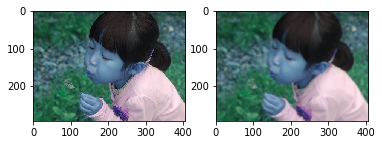

In [2]:
# 예제 6-1. 평균 필터를 생성해서 블러 적용(blur_avg_kernel.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/girl.jpg')
'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((5,5))/5**2
# 필터 적용             ---③
blured = cv2.filter2D(img, -1, kernel)

# 결과 출력
# cv2.imshow('origin', img)
# cv2.imshow('avrg blur', blured) 
# cv2.waitKey()
# cv2.destroyAllWindows()

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(blured)
plt.show()

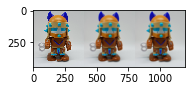

In [3]:
# 예제 6-2. 블러 전용 함수로 블러링 적용(blur_avg_api.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

file_name = 'img/taekwonv1.jpg'
img = cv2.imread(file_name)

# blur() 함수로 블러링  ---①
blur1 = cv2.blur(img, (10,10))
# boxFilter() 함수로 블러링 적용 ---②
blur2 = cv2.boxFilter(img, -1, (10,10))

# 결과 출력
merged = np.hstack( (img, blur1, blur2))
# cv2.imshow('blur', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.subplot(121)
plt.imshow(merged)
plt.show()

### 6.1.3 가우시안 블러링

k1: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
k2: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


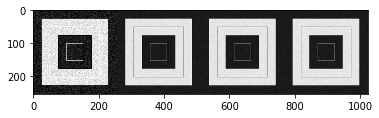

In [5]:
# 예제 6-3. 가우시안 블러(blur_gaussian.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/gaussian_noise.jpg')

# 가우시안 커널을 직접 생성해서 블러링  ---①
k1 = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) *(1/16)
blur1 = cv2.filter2D(img, -1, k1)

# 가우시안 커널을 API로 얻어서 블러링 ---②
k2 = cv2.getGaussianKernel(3, 0)
blur2 = cv2.filter2D(img, -1, k2*k2.T)

# 가우시안 블러 API로 블러링 ---③
blur3 = cv2.GaussianBlur(img, (3, 3), 0)

# 결과 출력
print('k1:', k1)
print('k2:', k2*k2.T)
merged = np.hstack((img, blur1, blur2, blur3))
# cv2.imshow('gaussian blur', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.1.4 미디언 블러링

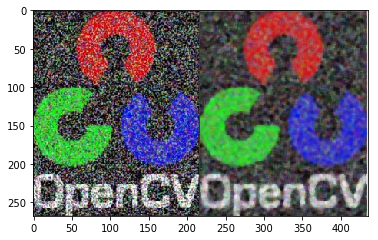

In [8]:
# 예제 6-4. 미디언 블러링(blur_median.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/salt_pepper_noise.jpg")

# 미디언 블러 적용 --- ①
blur = cv2.medianBlur(img, 5)

# 결과 출력 
merged = np.hstack((img,blur))
# cv2.imshow('media', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.1.5 바이레터럴 필터

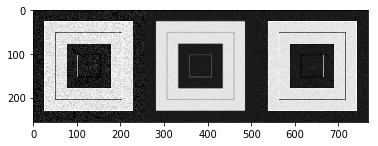

In [9]:
# 예제 6-5. 바이레터럴 필터와 가우시안 필터 비교(blur_bilateral.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/gaussian_noise.jpg")

# 가우시안 필터 적용 ---①
blur1 = cv2.GaussianBlur(img, (5,5), 0)

# 바이레터럴 필터 적용 ---②
blur2 = cv2.bilateralFilter(img, 5, 75, 75)

# 결과 출력
merged = np.hstack((img, blur1, blur2))
# cv2.imshow('bilateral', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

## 6.2 경계 검출

### 6.2.1 기본 미분 필터

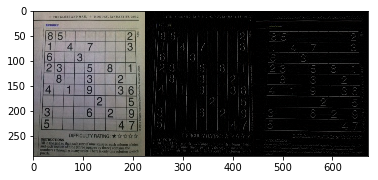

In [10]:
# 예제 6-6. 미분 커널로 경계 검출(edge_differential.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/sudoku.jpg")

#미분 커널 생성 ---①
gx_kernel = np.array([[ -1, 1]])
gy_kernel = np.array([[ -1],[ 1]])

# 필터 적용 ---②
edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)
# 결과 출력
merged = np.hstack((img, edge_gx, edge_gy))
# cv2.imshow('edge', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.2.2 로버트 교차 필터

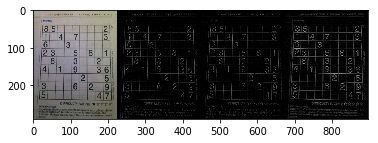

In [11]:
# 예제 6-7. 로버츠 마스크를 적용한 경계 검출(edge_roberts.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/sudoku.jpg")

# 로버츠 커널 생성 ---①
gx_kernel = np.array([[1,0], [0,-1]])
gy_kernel = np.array([[0, 1],[-1,0]])

# 커널 적용 ---② 
edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

# 결과 출력
merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
# cv2.imshow('roberts cross', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.2.3 프리윗 필터

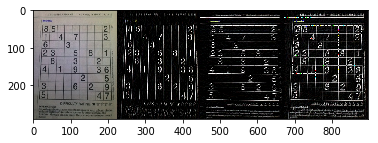

In [12]:
# 예제 6-8. 프리윗 마스크를 적용한 경계 검출(edge_prewitt.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

file_name = "img/sudoku.jpg"
img = cv2.imread(file_name)

# 프리윗 커널 생성
gx_k = np.array([[-1,0,1], [-1,0,1],[-1,0,1]])
gy_k = np.array([[-1,-1,-1],[0,0,0], [1,1,1]])

# 프리윗 커널 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 결과 출력
merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
# cv2.imshow('prewitt', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.2.4 소벨 필터

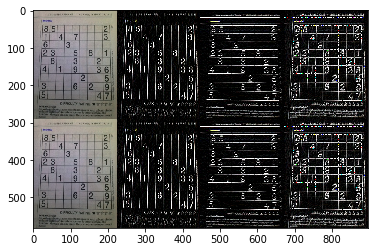

In [13]:
# 예제 6-9. 소벨 마스크를 적용한 경계 검출(edge_sobel.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/sudoku.jpg")

# 소벨 커널을 직접 생성해서 엣지 검출 ---①
## 소벨 커널 생성
gx_k = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
gy_k = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])
## 소벨 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 소벨 API를 생성해서 엣지 검출
sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(img, -1, 0, 1, ksize=3) 

# 결과 출력
merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
merged2 = np.hstack((img, sobelx, sobely, sobelx+sobely))
merged = np.vstack((merged1, merged2))
# cv2.imshow('sobel', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.2.5 샤르 필터

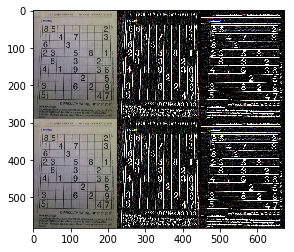

In [14]:
# 예제 6-10. 샤르 마스크를 적용한 경계 검출(edge_scharr.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/sudoku.jpg")

# 샤르 커널을 직접 생성해서 엣지 검출 ---①
gx_k = np.array([[-3,0,3], [-10,0,10],[-3,0,3]])
gy_k = np.array([[-3,-10,-3],[0,0,0], [3,10,3]])
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 샤르 API로 엣지 검출 ---②
scharrx = cv2.Scharr(img, -1, 1, 0)
scharry = cv2.Scharr(img, -1, 0, 1)

# 결과 출력
merged1 = np.hstack((img, edge_gx, edge_gy))
merged2 = np.hstack((img, scharrx, scharry))
merged = np.vstack((merged1, merged2))
# cv2.imshow('Scharr', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.2.6 라플라시안 필터

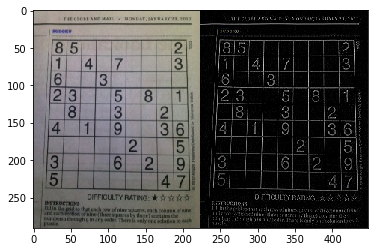

In [15]:
# 예제 6-11. 라플라시안 마스크를 적용한 경계 검출(edge_laplacian.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/sudoku.jpg")

# 라플라시안 필터 적용 ---①
edge = cv2.Laplacian(img, -1)

# 결과 출력
merged = np.hstack((img, edge))
# cv2.imshow('Laplacian', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.2.7 캐니 엣지

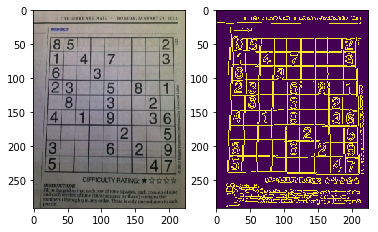

In [16]:
# 예제 6-12. 캐니 엣지 검출(edge_canny.py)

import cv2, time
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/sudoku.jpg")

# 케니 엣지 적용 
edges = cv2.Canny(img,100,200)

# 결과 출력
# cv2.imshow('Original', img)
# cv2.imshow('Canny', edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(edges)
plt.show()

## 6.3 모폴로지

### 6.3.1 침식 연산

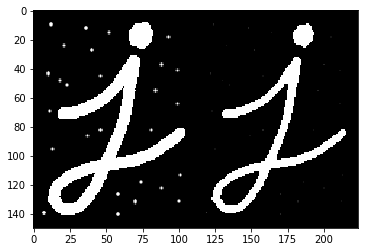

In [17]:
# 예제 6-13. 침식 연산(morph_erode.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/morph_dot.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 침식 연산 적용 ---②
erosion = cv2.erode(img, k)

# 결과 출력
merged = np.hstack((img, erosion))
# cv2.imshow('Erode', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.3.2 팽창 연산

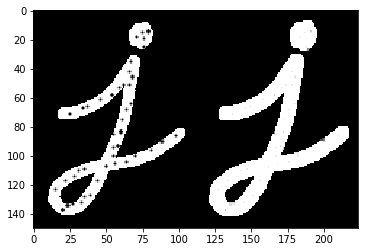

In [18]:
# 예제 6-14. 팽창 연산(morph_dilate.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/morph_hole.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 팽창 연산 적용 ---②
dst = cv2.dilate(img, k)

# 결과 출력
merged = np.hstack((img, dst))
# cv2.imshow('Dilation', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

### 6.3.3 열림과 닫힘, 그밖의 모폴로지 연산

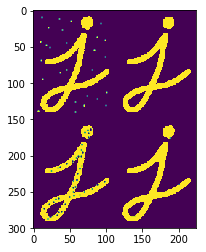

In [19]:
# 예제 6-15. 열림과 닫힘 연산으로 노이즈 제거(morph_open_close.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('img/morph_dot.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img/morph_hole.png', cv2.IMREAD_GRAYSCALE)    

# 구조화 요소 커널, 사각형 (5x5) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# 열림 연산 적용 ---②
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, k)
# 닫힘 연산 적용 ---③
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, k)

# 결과 출력
merged1 = np.hstack((img1, opening))
merged2 = np.hstack((img2, closing))
merged3 = np.vstack((merged1, merged2))
# cv2.imshow('opening, closing', merged3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged3)
plt.show()

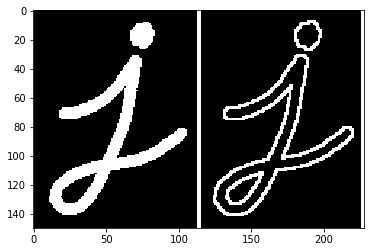

In [21]:
# 예제 6-16. 모폴로지 그레디언트(morph_gradient.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/morphological.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 열림 연산 적용 ---②
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, k)

# 결과 출력
merged = np.hstack((img, gradient))
# cv2.imshow('gradient', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()

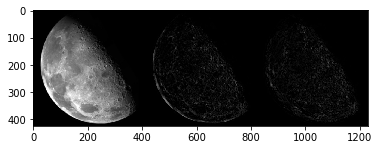

In [22]:
# 예제 6-17. 모폴로지 탑햇, 블랙햇 연산(morph_hat.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/moon_gray.jpg')

# 구조화 요소 커널, 사각형 (5x5) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
# 탑햇 연산 적용 ---②
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)
# 블랫햇 연산 적용 ---③
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

# 결과 출력
merged = np.hstack((img, tophat, blackhat))
# cv2.imshow('tophat blackhat', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(merged)
plt.show()